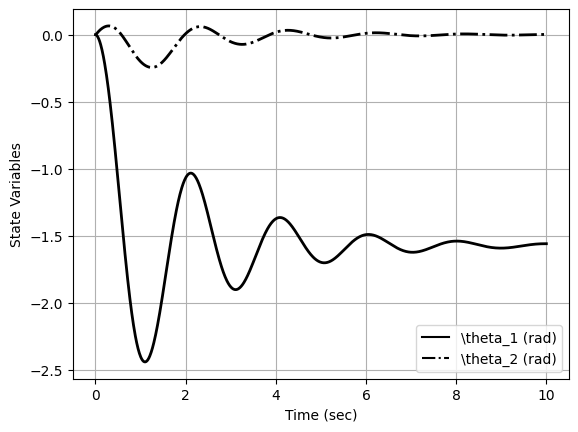

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# تابع برای مدل ربات 2R
def robot_model(t, x):
    g = 9.81
    l1 = 1.0
    l2 = 0.5
    m1 = 2.0
    m2 = 1.0
    I1 = 1e-2
    I2 = 5e-3
    D = 2.0

    M = np.zeros((2, 2))
    M[0, 0] = m1 * (l1 / 2)**2 + m2 * (l1**2 + (l2 / 2)**2) + m2 * l1 * l2 * np.cos(x[1]) + I1 + I2
    M[0, 1] = m2 * (l2 / 2)**2 + 0.5 * m2 * l1 * l2 * np.cos(x[1]) + I2
    M[1, 0] = M[0, 1]
    M[1, 1] = m2 * (l2 / 2)**2 + I2

    V = np.zeros((2, 1))
    V[0, 0] = -m2 * l1 * l2 * np.sin(x[1]) * x[2] * x[3] - 0.5 * m2 * l1 * l2 * np.sin(x[1]) * x[3]**2
    V[1, 0] = -0.5 * m2 * l1 * l2 * np.sin(x[1]) * x[2] * x[3]

    G = np.zeros((2, 1))
    G[0, 0] = (m1 * l1 / 2 + m2 * l1) * g * np.cos(x[0]) + m2 * g * l2 / 2 * np.cos(x[0] + x[1])
    G[1, 0] = m2 * g * l2 / 2 * np.cos(x[0] + x[1])

    Q = np.zeros((2, 1))  # بدون ورودی
    Q = Q - D * np.array([[x[2]], [x[3]]])
    xy = np.linalg.pinv(M).dot(Q - V - G)
    xp = [x[2], x[3], xy[0, 0], xy[1, 0]]

    return xp

# پارامترهای شبیه‌سازی
tspan = (0, 10)
y0 = [0, 0, 0, 0]

# حل معادلات دیفرانسیل
sol = solve_ivp(robot_model, tspan, y0, max_step=1e-2)

# رسم نتایج شبیه‌سازی
plt.plot(sol.t, sol.y[0], 'k', label='\\theta_1 (rad)')
plt.plot(sol.t, sol.y[1], '-.k', label='\\theta_2 (rad)')
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel('State Variables')
plt.legend()
plt.gca().lines[0].set_linewidth(2)
plt.gca().lines[1].set_linewidth(2)
plt.show()
